<a href="https://colab.research.google.com/github/AimoneCG/Proyecto-CoderHouse-Data-Science-I-Fundamentos-para-la-Ciencia-de-Datos/blob/main/ProyectoDS_Entrega_Final_Aimone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Entrega Final** -  Cristian Aimone
# Data Science I : Fundamentos para la Ciencia de Datos
# Comisión 61675
### Fecha: 04/11/2024


# Metadata


### Abstract

- El dataset elegido contiene una visión global de los estudiantes matriculados en diversas titulaciones de grado ofrecidas en una institución de enseñanza superior.
- Incluye datos demográficos, factores socioeconómicos e información sobre el rendimiento académico que pueden utilizarse para analizar los posibles factores predictivos del abandono y el éxito académico de los estudiantes.
- Este conjunto de datos contiene múltiples bases de datos disjuntas compuestas por información relevante disponible en el momento de la matriculación, como el modo de solicitud, el estado civil, el curso elegido, etc. Además, estos datos pueden utilizarse para estimar el rendimiento global de los estudiantes al final de cada semestre mediante la evaluación de las unidades curriculares acreditadas/matriculadas/evaluadas/aprobadas, así como sus respectivas calificaciones.
- Por último, disponemos de la tasa de desempleo, la tasa de inflación y el PIB de la región, que pueden llegar a ayudarnos a comprender mejor cómo influyen los factores económicos en las tasas de abandono escolar o en los resultados académicos.
- El análisis se realizará desde el punto de vista de una institución educativa cn el fin de obtener valiosa información sobre lo que motiva a los estudiantes a permanecer en la escuela o abandonar sus estudios para una amplia gama de disciplinas como agronomía, diseño, educación enfermería periodismo gestión servicio social o tecnologías


- Este conjunto de datos fue obtenido de : [https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention] .

# Hipótesis

Se estabablece

# Objetivos



*   Analizar desde el punto de vista de la institución educativa cuales son los factores que hacen que los estudiantes sigan con sus estudios, o los abandonen
*   Poder determinar por el análisis de los datos cuales son las condiciones que se cumplen para el exito en las carreras de mayor cantidad de alumnos que continuan para ver si se pueden replicar con los alumnos de otras carreras






# Usuario final del Proyecto

El análisis está destinado a la institución educativa que aporta los datos.

# Diccionario de Variables

- Marital status => Estado civil: Estado civil del alumno.
(Categórico)
- Application mode => Modo de solicitud: El método de solicitud utilizado por el estudiante. (Categórica)
- Application order => Orden de solicitud: El orden en que el estudiante presentó la solicitud. (Numérico)
- Course => Curso: Curso realizado por el estudiante. (Categórico)
- Daytime/evening attendance => Asistencia diurna/noche: Si el alumno asiste a clase durante el día o por la noche. (Categórico)
- Previous qualification => Titulación previa: La titulación obtenida por el estudiante antes de matricularse en la enseñanza superior. (Categórica)
- Nacionality => Nacionalidad: Nacionalidad del estudiante. (Categórica)
- Mother's qualification => Titulación de la madre: Titulación de la madre del estudiante. (Categórica)
- Father's qualification => Titulación del padre: Titulación del padre del alumno. (Categórica)
- Mother's occupation => Profesión de la madre: Profesión de la madre del estudiante. (Categórica)
- Father's occupation => Profesión del padre: Profesión del padre del alumno. (Categórica)
- Displaced => Desplazado: Si el estudiante es una persona desplazada. (Categórica)
- Educational special needs => Necesidades educativas especiales: Si el alumno tiene necesidades educativas especiales. (Categórico)
- Debtor => Deudor: Si el estudiante es deudor. (Categórico)
- Tuition fees up to date => Pago al día: Si las colegiaturas del estudiante están al día. (Categórico)
- Gender => Género: Genero o sexo del estudiante. (Categórico)
- Scholarship holder => Becario: Si el estudiante es becario. (Categórico)
- Age at enrollment => Edad de inscripción: Edad del estudiante en el momento de la inscripción. (Numérico)
- International => Internacional: Si el estudiante es internacional. (Categórico)
- Curricular units 1st sem (credited) => Unidades curriculares 1er sem (acreditadas): El número de unidades curriculares acreditadas por el estudiante en el primer semestre. (Numérico)
- Curricular units 1st sem (enrolled) => Unidades curriculares 1er sem (matriculadas): Número de unidades curriculares matriculadas por el alumno en el primer semestre. (Numérico)
- Curricular units 1st sem (evaluations) => Unidades curriculares 1er sem (evaluaciones): Número de unidades curriculares evaluadas por el alumno en el primer semestre. (Numérico)
- Curricular units 1st sem (approved) => Unidades curriculares 1er sem (aprobadas): Número de unidades curriculares aprobadas por el alumno en el primer semestre. (Numérico)

#Importación de librerias

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.datasets import load_iris
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


#Importación del dataset desde github

In [74]:
url = "https://raw.githubusercontent.com/AimoneCG/Proyecto-CoderHouse-Data-Science-I-Fundamentos-para-la-Ciencia-de-Datos/main/dataset.csv"

df = pd.read_csv(url)

# Pre visualización del dataset

*   Analizamos la cabezera con el metodo head




In [75]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate




*   Se analiza la dimensionalidad del dataset usando el método shape




In [76]:
df.shape

(4424, 35)

El dataset contiene 4424 filas y 35 columnas.
Se puede apreciar que contiene tanto variables categóricas como númericas



*   Utilizo el método info para observar existencia de datos nulos y no nulos



In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

El dataset no contiene valores nulos



*   Mediante el método describe para realizar un resumen estadístico del dataframe


In [78]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


# EDA - Análisis exploratorio de los datos

* Imprimimos las columnas para tener los nombres

In [79]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

# Histograma para todas las variables

* Utilizo el histograma para ver el comportamiento de cada variable respecto del conteo para conocer su distribución

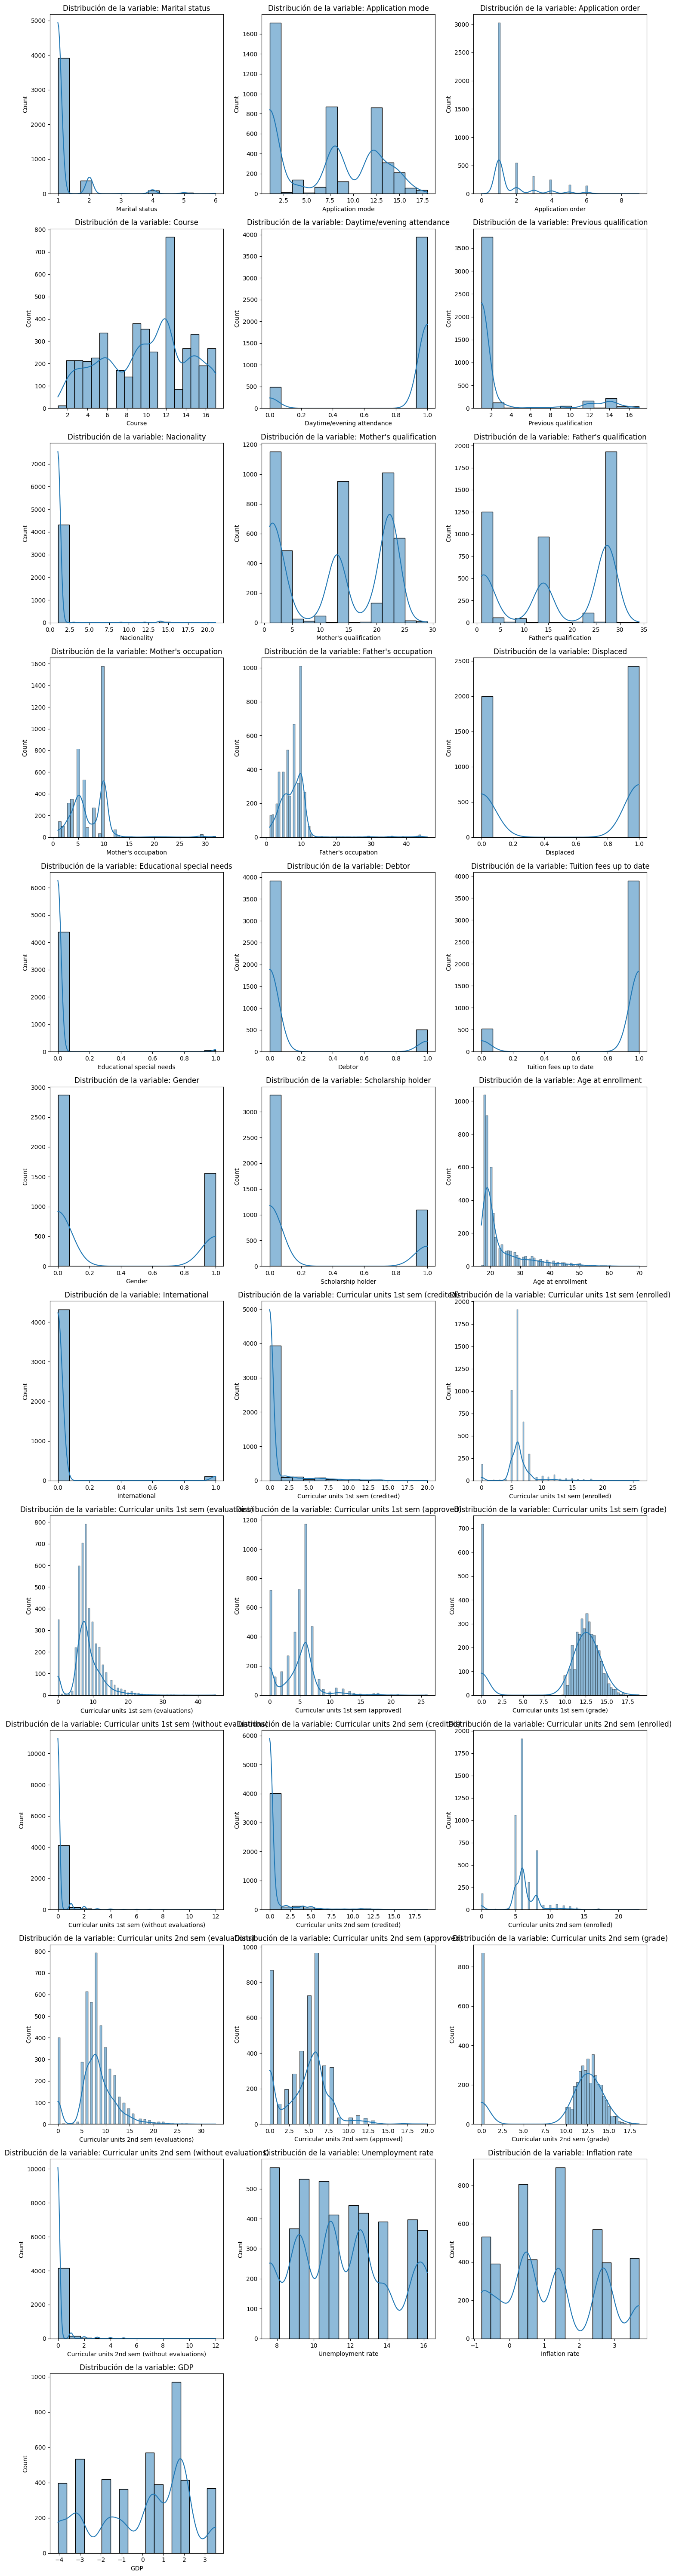

In [80]:
numerical_features = df.select_dtypes(include=['number']).columns
num_plots = len(numerical_features)
cols = 3  # para mostrar 3 columnas por fila
rows = (num_plots + cols - 1) // cols  # para alcular el numero de filas

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  # ajustar el tamaño

for i, feature in enumerate(numerical_features):
  row_index = i // cols
  col_index = i % cols

  sns.histplot(x=feature, data=df, kde=True, ax=axes[row_index, col_index])
  axes[row_index, col_index].set_title(f"Distribución de la variable: {feature}")

# para remover subplots no utilizados
for i in range(num_plots, rows * cols):
  row_index = i // cols
  col_index = i % cols
  fig.delaxes(axes[row_index, col_index])

plt.tight_layout()  # Ajusta los parametros para mostrarlos mas ajustados
plt.show()

#Gráficos

# Histograma para ver la distribución de la Edad al momento de inscripción

Hipotesis: Se estima que la mayoria de los estudiantes se inscriben en la universidad antes de los 25 años.

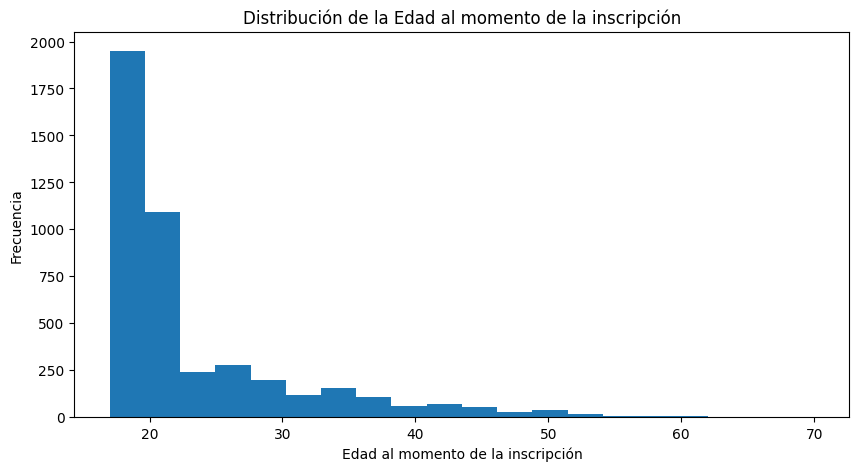

In [81]:
# Matplotlib: Univariado
plt.figure(figsize=(10, 5))
plt.hist(df['Age at enrollment'], bins=20)
plt.xlabel('Edad al momento de la inscripción')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Edad al momento de la inscripción')
plt.show()

# Interpretación

* Como era de suponer la mayoria de los estudiantes ingresan a la universidad antes de los 25 años
* Se confirma la hipotesis

# Grafico de Torta: Distribución por género

Se busca ver si en el universo del dataset estan representados ambos generos por igual

Hipótesis: Se estima que la cantidad de hombres y mujeres es equilibrada, y eso dará a la postre una información de que género abandona la cursada o no aprueba

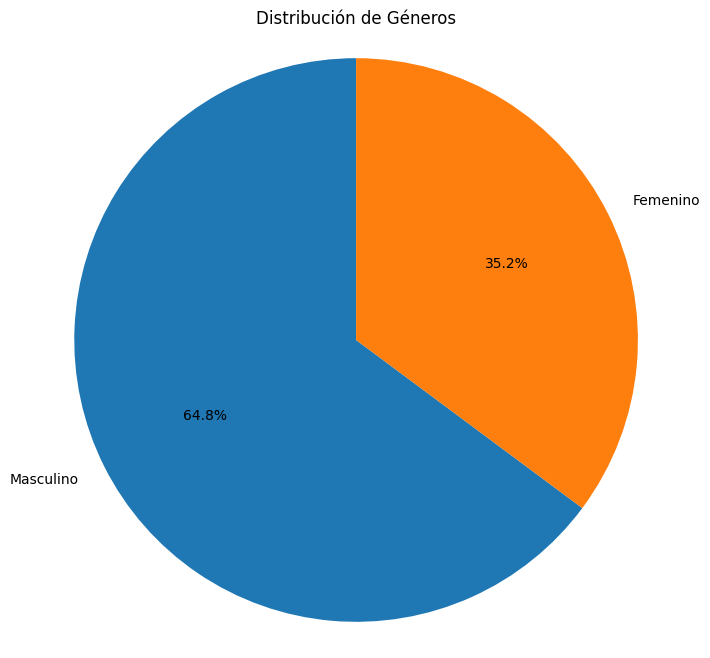

In [82]:
# Pie chet de Mathplotlib mostrando la distribución por cantidad de cada genero, siendo el valor 0 = Masculino y 1= Femenino

# Para ontar la cantidad de estudiantes de cada género
genero_counts = df['Gender'].value_counts()

# Para crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(genero_counts, labels=['Masculino', 'Femenino'], autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Géneros')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

# Interpretación:

* No se puede confirmar la hipótesis ya que el porcentaje de hombres es mayor al de las mujeres ( Aprox. 65% Vs 35%)

# Diagrama de dispersión para ver la relación entre la edad y las unidades aprobadas (1° Sem)

Hipótesis: se cree que a mayor edad costará mas aprobar las materias del primer semestre ya que posiblemente otras responsabilidades de personas adultas como el trabajo o la familia hacen mas dificil tener tiempo para estudiar apropiadamente

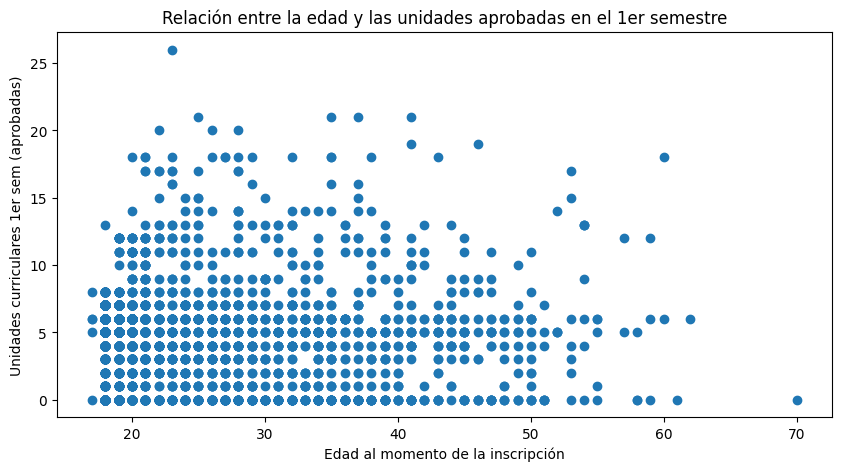

In [83]:
# Matplotlib: Bivariado
plt.figure(figsize=(10, 5))
plt.scatter(df['Age at enrollment'], df['Curricular units 1st sem (approved)'])
plt.xlabel('Edad al momento de la inscripción')
plt.ylabel('Unidades curriculares 1er sem (aprobadas)')
plt.title('Relación entre la edad y las unidades aprobadas en el 1er semestre')
plt.show()

Se realiza el mismo gráfico en Seaborn adicionando la diferenciación por género

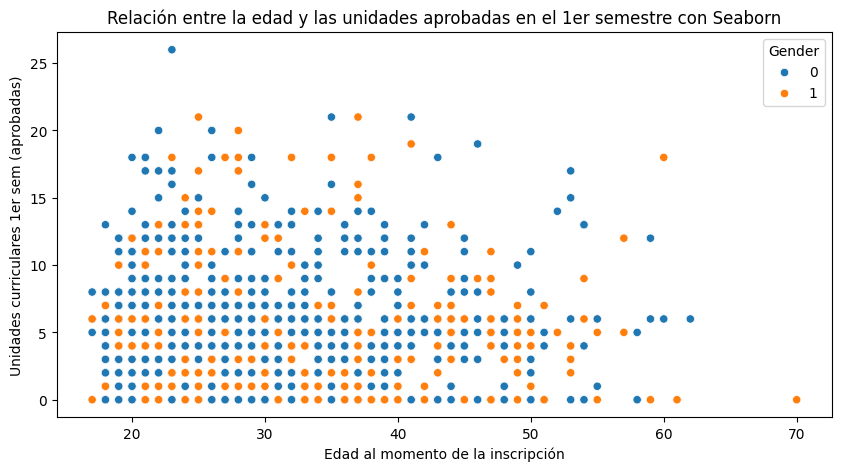

In [84]:
# Seaborn: Bivariado
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Age at enrollment', y='Curricular units 1st sem (approved)', hue='Gender', data=df)
plt.xlabel('Edad al momento de la inscripción')
plt.ylabel('Unidades curriculares 1er sem (aprobadas)')
plt.title('Relación entre la edad y las unidades aprobadas en el 1er semestre con Seaborn')
plt.show()

# Interpretación:

* No se puede confirmar la hipotesis planteada.
* A pesar de mostrar algunos casos de alumnos de mayor edad que no aprobaron materias, la distribución acompaña a la cantidad de alumnos de las distintas edades, por lo que no puede compararse apropiadamente el punto en cuestión

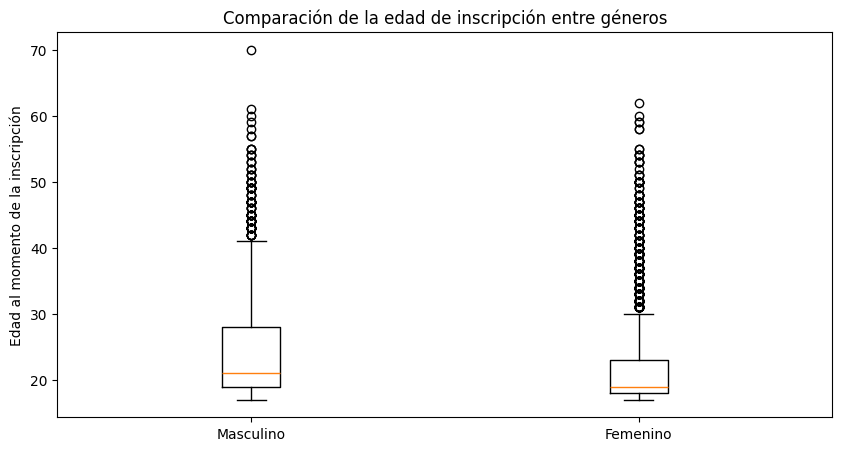

In [85]:
# Matplotlib: Libre elección
plt.figure(figsize=(10, 5))
plt.boxplot([df[df['Gender'] == 1]['Age at enrollment'], df[df['Gender'] == 0]['Age at enrollment']], labels=['Masculino', 'Femenino'])
plt.ylabel('Edad al momento de la inscripción')
plt.title('Comparación de la edad de inscripción entre géneros')
plt.show()

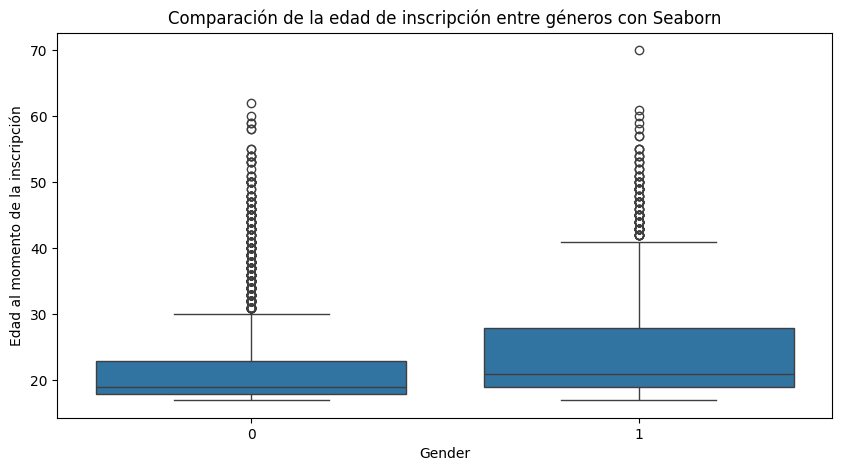

In [86]:
# Seaborn: Univariado
plt.figure(figsize=(10, 5))
sns.boxplot(x='Gender', y='Age at enrollment', data=df)
plt.ylabel('Edad al momento de la inscripción')
plt.title('Comparación de la edad de inscripción entre géneros con Seaborn')
plt.show()


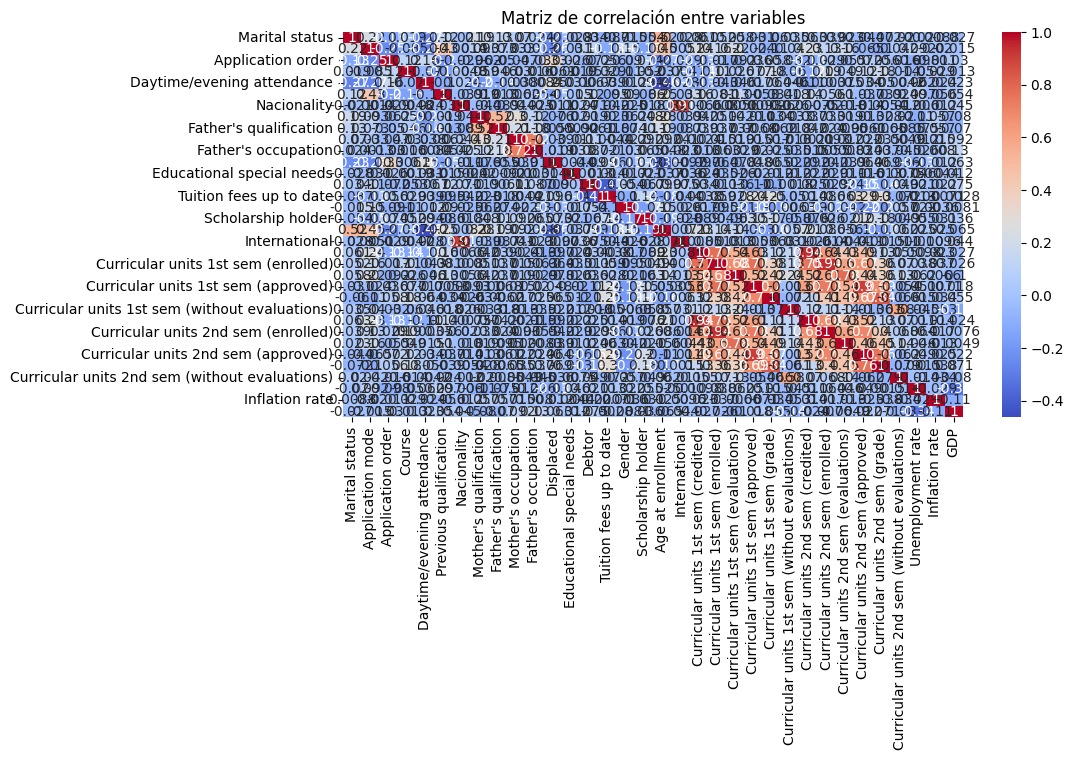

In [87]:
# Seaborn: Matriz de correlacion
plt.figure(figsize=(10, 5))
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables')
plt.show()

#me quedó muy desprolijo _ Corregir

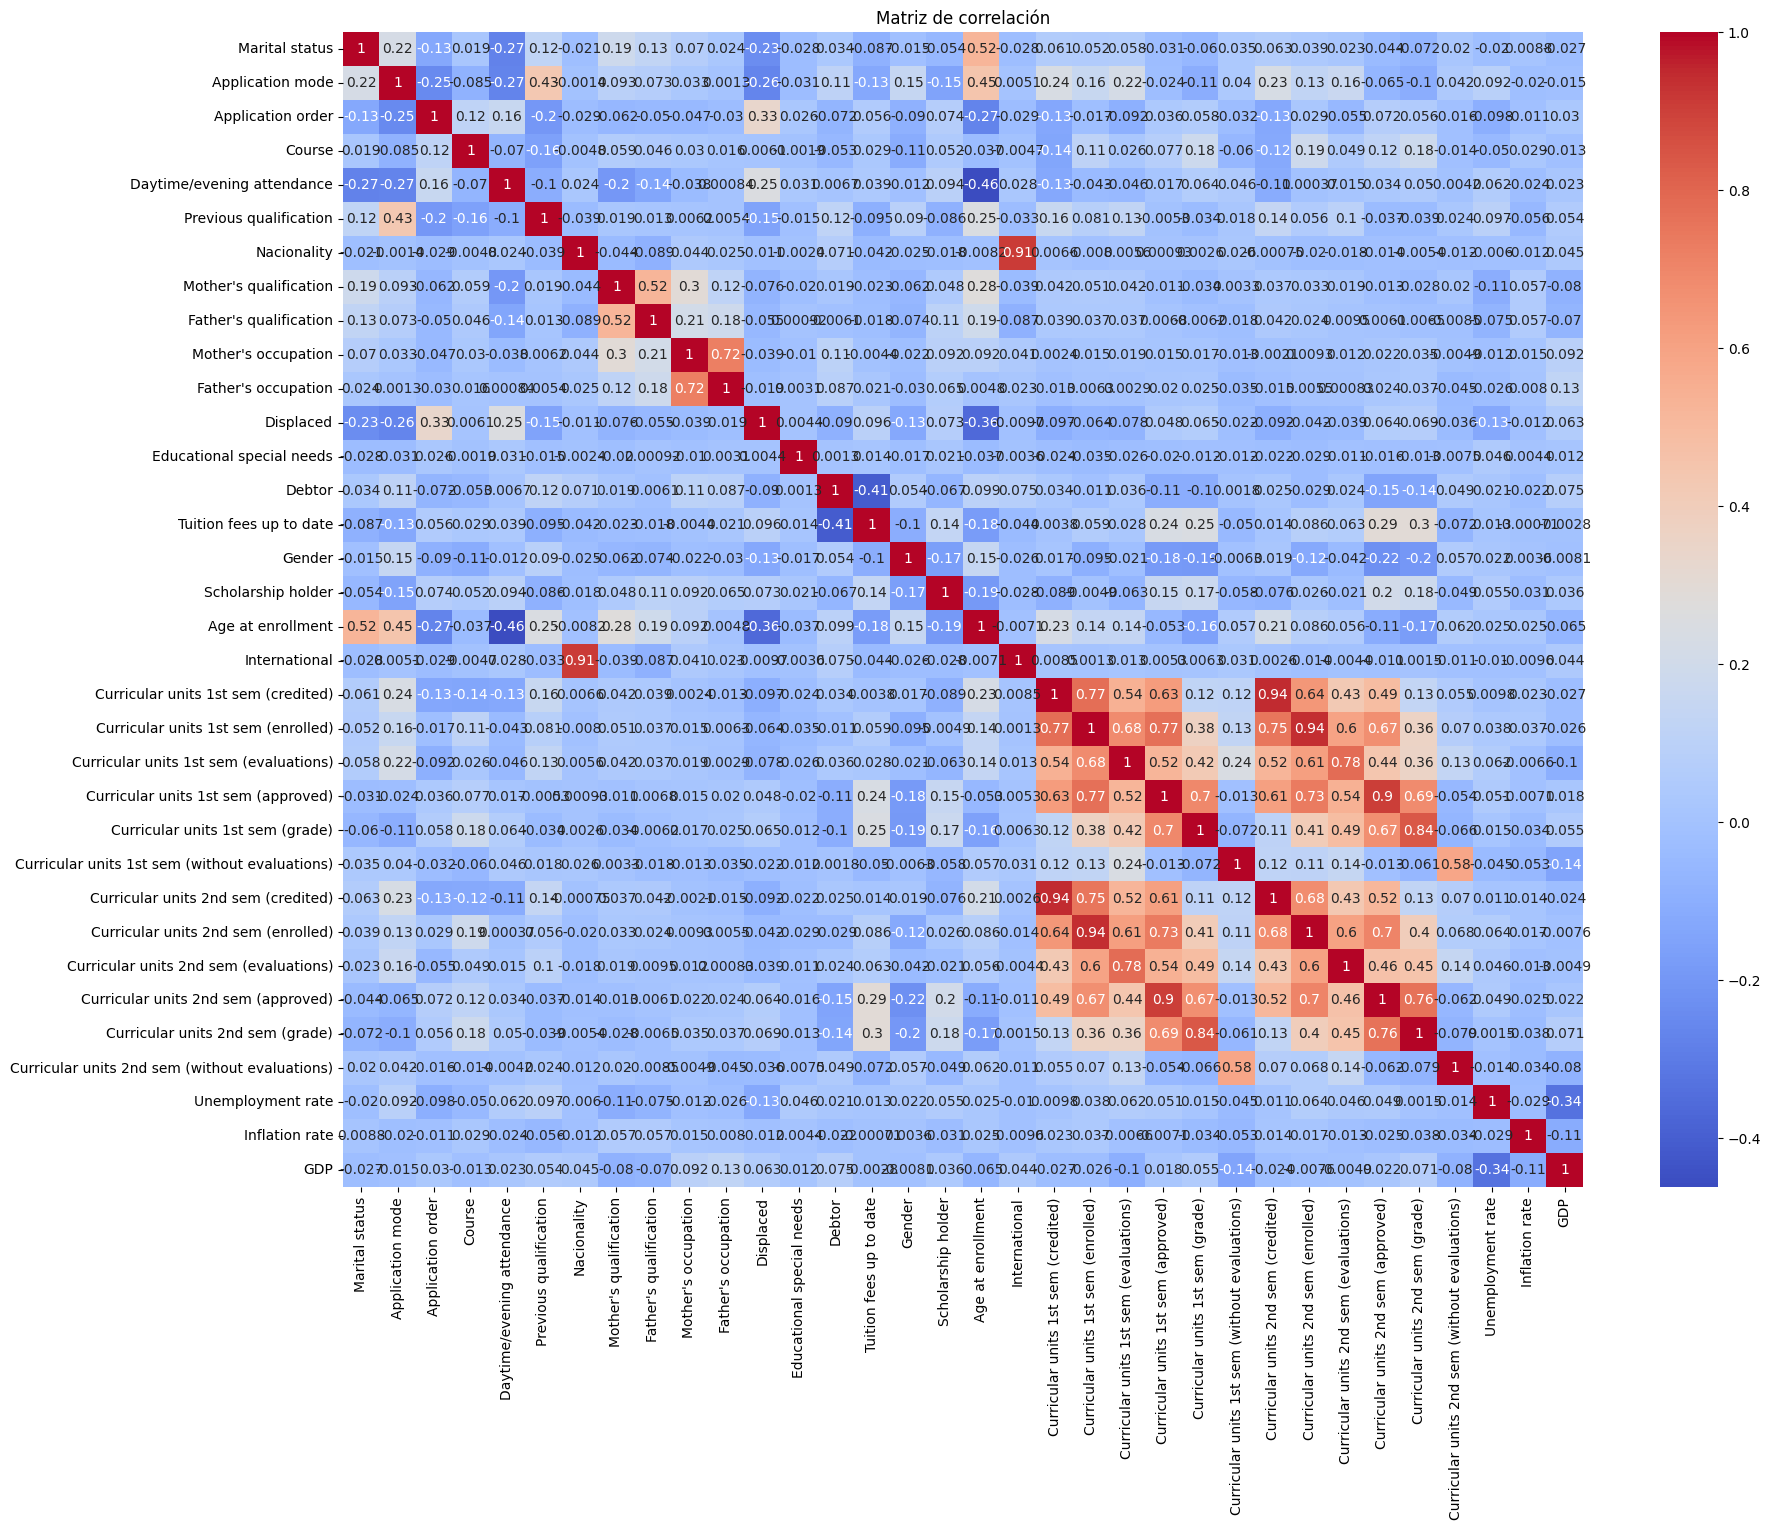

In [88]:
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

In [89]:
nuevos_nombres_columna = {'Mother\'s qualification' : 'Mothers qualification',
    'Father\'s qualification' : 'Father qualification',
    'Mother\'s occupation' : 'Mothers occupation',
    'Father\'s occupation' : 'Father occupation' }
df = df.rename(columns=nuevos_nombres_columna)



In [90]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mothers qualification', 'Father qualification', 'Mothers occupation',
       'Father occupation', 'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Un

In [91]:
# Lista de nombres de columnas que deseas eliminar
columnas_a_eliminar = ['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mothers qualification', 'Father qualification', 'Mothers occupation',
       'Father occupation', 'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder','Inflation rate', 'GDP']

# Eliminar las columnas del DataFrame
df_reducido = df.drop(columns=columnas_a_eliminar)

# Mostrar el DataFrame actualizado
df_reducido.shape

(4424, 16)

In [92]:
print(df_reducido.head)


<bound method NDFrame.head of       Age at enrollment  International  Curricular units 1st sem (credited)  \
0                    20              0                                    0   
1                    19              0                                    0   
2                    19              0                                    0   
3                    20              0                                    0   
4                    45              0                                    0   
...                 ...            ...                                  ...   
4419                 19              0                                    0   
4420                 18              1                                    0   
4421                 30              0                                    0   
4422                 20              0                                    0   
4423                 22              1                                    0   

      Curricular unit

In [93]:
# Codifico la variable objetivo 'Target' Usando LabelEncoder
label_encoder = LabelEncoder()
df_reducido['Target_Encoded'] = label_encoder.fit_transform(df_reducido['Target'])

# Verifico
print(df_reducido['Target'].value_counts())
print(label_encoder.classes_)
print(df_reducido[['Target', 'Target_Encoded']].head())

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64
['Dropout' 'Enrolled' 'Graduate']
     Target  Target_Encoded
0   Dropout               0
1  Graduate               2
2   Dropout               0
3  Graduate               2
4  Graduate               2


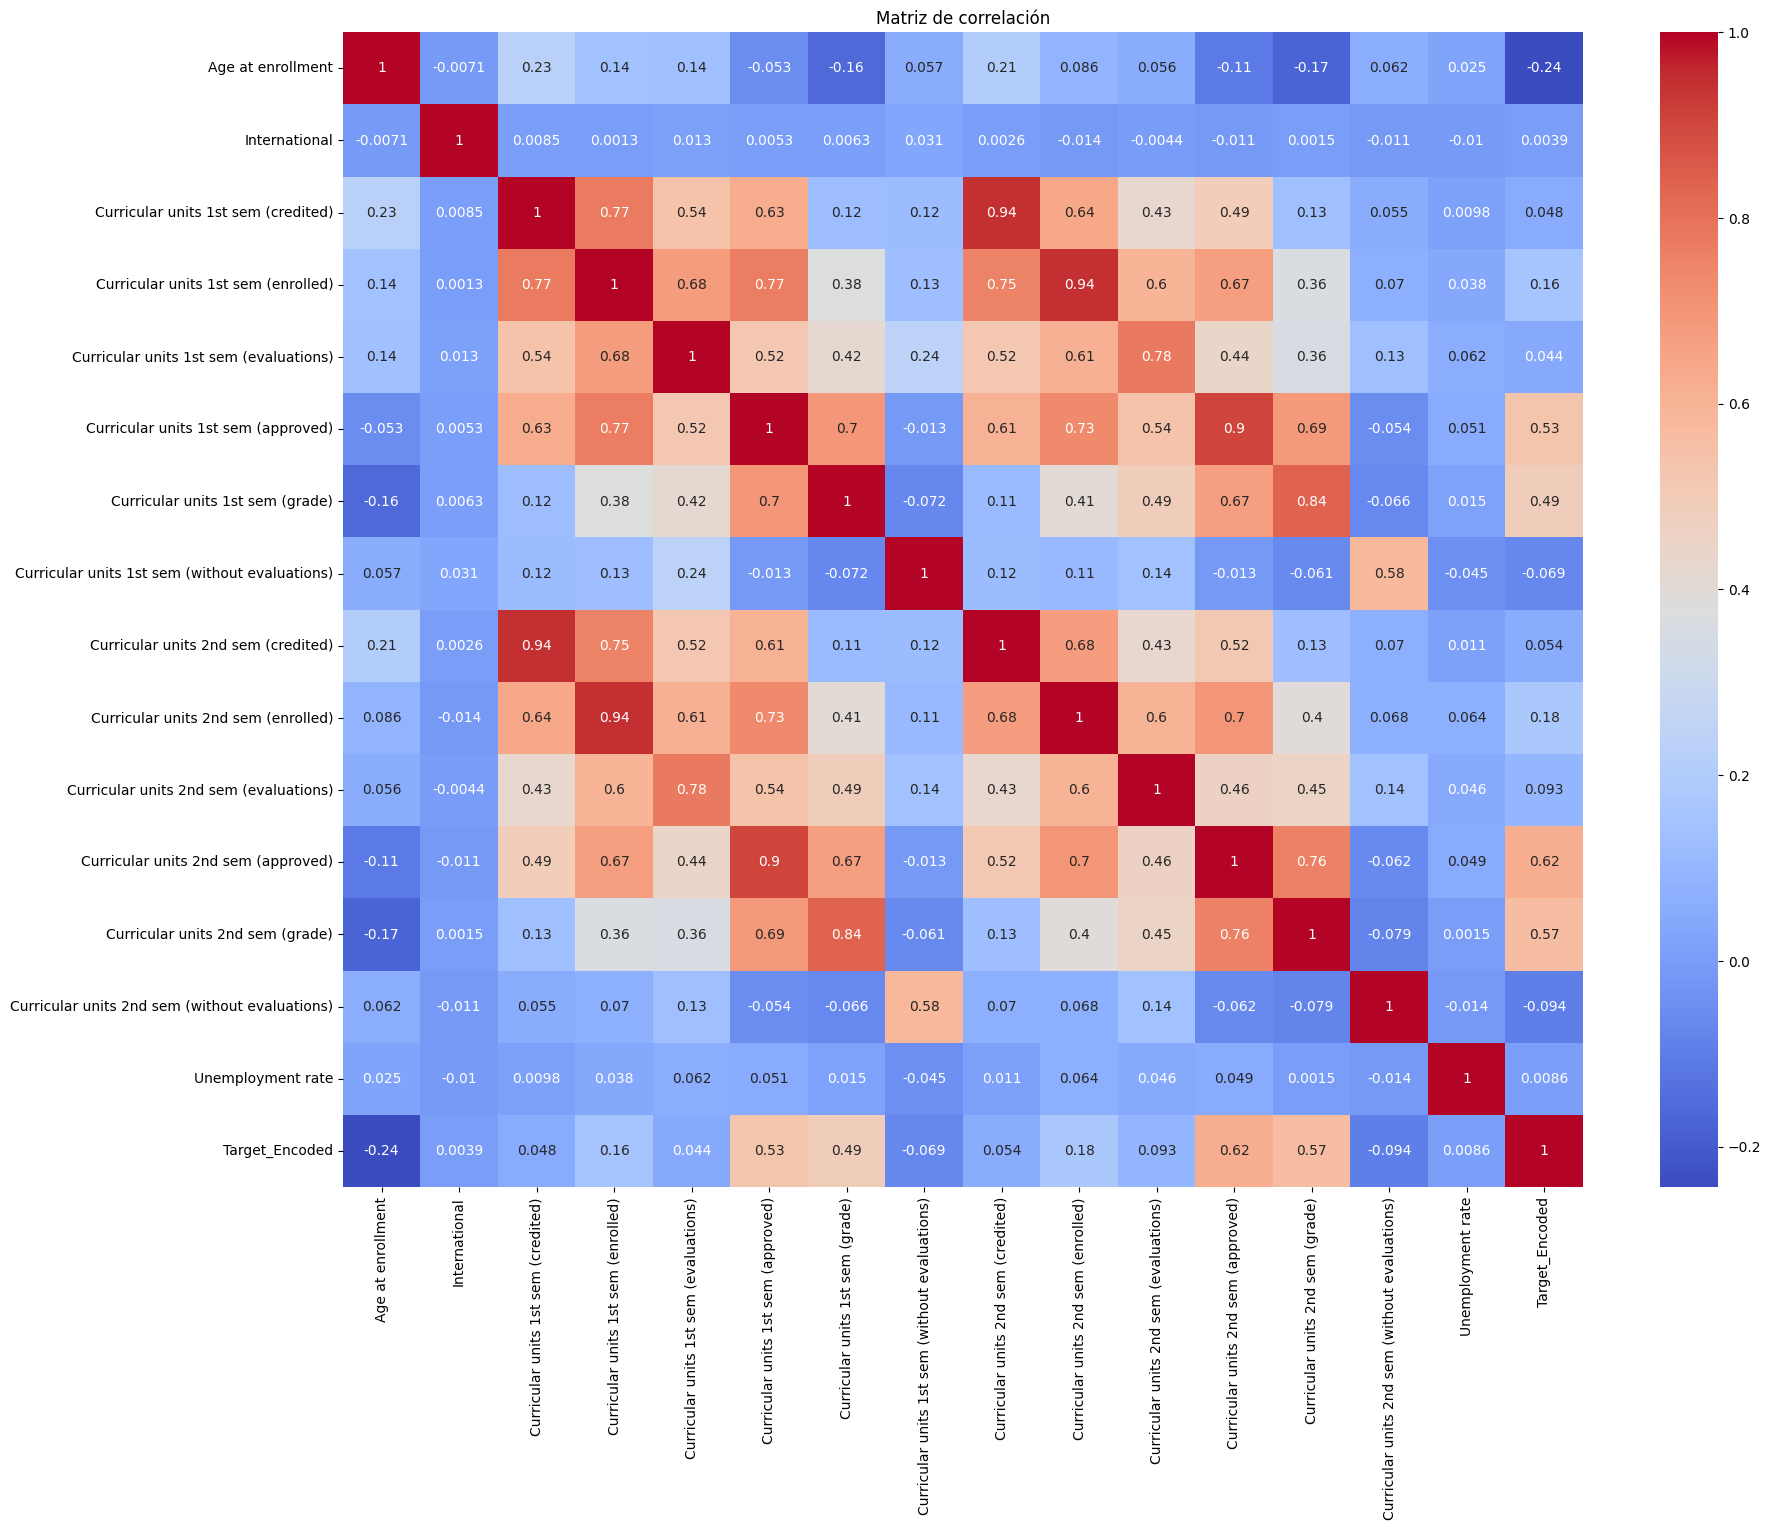

In [104]:
df_2 = df_reducido.drop('Target', axis=1)
correlation_matrix = df_2.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

In [117]:
df_reducido = df_reducido.drop('Target', axis=1)
x = df_reducido.drop('Target_Encoded', axis=1)
y = df_reducido['Target_Encoded']

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [123]:
# Escalar características- columnas normales por el standard y la que no son normales van por el robustscaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train) # Changed X_train to x_train
X_test_scaled = scaler.transform(x_test) # Changed X_test to x_test

# FEATURE SELECTION

In [124]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.386538319346337


In [125]:
# You can also use other regression models like RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Random Forest): {mse}")

Mean Squared Error (Random Forest): 0.38688806142968996
